# EE 521(DSP LAB) ASSIGNMENT 04 : JYOTIRMOY DEKA(204102321)

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Discrete Fourier Transform:

In [72]:
def DFT(seq,N):
    seq1 = np.zeros(N,dtype = 'complex')
    
    for k in range(N):
        for n in range(N):
            theta = 2j*np.pi*n*k/N
            seq1[k] = seq1[k]+seq[n]*np.exp(-theta)
    return seq1

# Inverse Discrete FOURIER TRANSFORM:

In [73]:
def IDFT(SEQ,N):
    SEQ1 = np.zeros(N,dtype = 'complex')
    
    for n in range(N):
        for k in range(N):
            theta = 2j*np.pi*n*k/N
            SEQ1[n] = SEQ1[n]+SEQ[k]*np.exp(-theta)
    SEQ1=SEQ1/N
    return SEQ1

# Write a function to compute the circular convolution of two sequences.Find the circular convolution of x = [1, 2, 3, 0, 0, 0, 0] and h = [1, 1, 1, 1, 1, 1, 1] using the function.

In [74]:
def cir_conv(x,h):
    output=[]
    m = len(x)
    g = x[::-1]
    for i in range(0,m):
        g = g[-1:]+g[:-1]
        b = sum([a*b for a,b in zip(g,h)])
        output.append(b)
    return output

x=[1,2,3,0,0,0,0]
h=[1,1,1,1,1,1,1]
y= cir_conv(x,h)
print("the circular convolution of x and h is :",y)

the circular convolution of x and h is : [6, 6, 6, 6, 6, 6, 6]


# A signal is given as x(t) = cos2πf t where f = 30 Hz. The signal is sampled at 100 times per second for 10 seconds and then its DFT is computed. Plot the spectrum versus frequency in Hz.

In [75]:
A =1
f0=30
fs = 100 
T=0.91
N=91
n = np.arange(N)
fn = (n*fs)/N
t =np.arange(0,T,1/fs)
x = A*np.cos(2*np.pi*f0*t)
y = DFT(x,N)

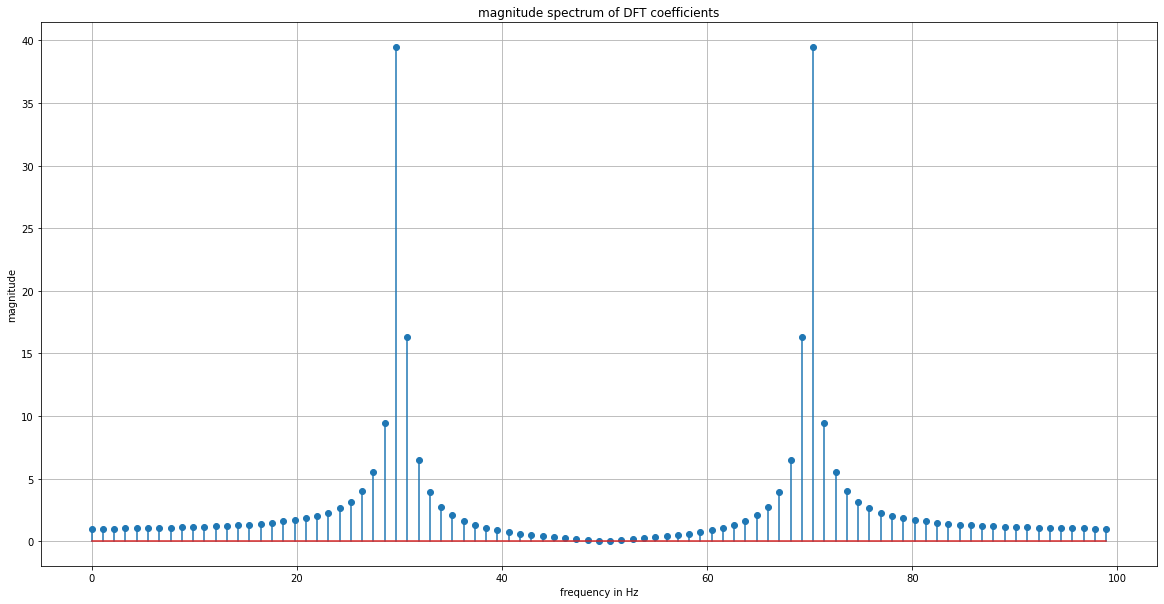

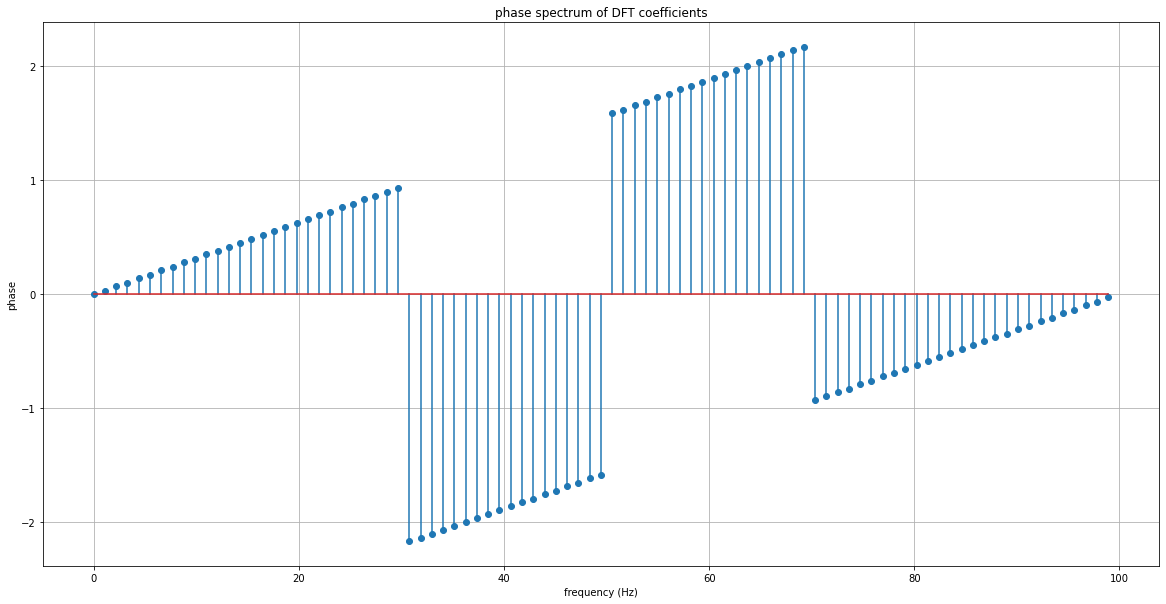

In [76]:
# for plotting the spectrum 
mag_y = np.round(np.abs(y),2)
phase_y = np.round(np.angle(y),2)
fig = plt.figure(figsize=(20,10))
plt.stem(fn,mag_y)
plt.title('magnitude spectrum of DFT coefficients')
plt.ylabel('magnitude')
plt.xlabel('frequency in Hz')
plt.grid(True)
plt.show()
fig = plt.figure(figsize=(20,10))
plt.stem(fn,phase_y)
plt.title('phase spectrum of DFT coefficients')
plt.ylabel('phase')
plt.xlabel('frequency (Hz)')
plt.grid()

# What is the magnitude of DFT at 35 Hz?

In [77]:
mag = np.round(np.abs(y)[np.round(fn)==35][0],2)
print('The magnitude of the DFT coefficient at f = 35Hz is:',mag)

The magnitude of the DFT coefficient at f = 35Hz is: 2.05


# Consider the two sequences x = [1, −3, 1, 5] and y = [7, −7, −9, −3]. Does there exist a sequence h such that y is the circular convolution of x and h. Find h using DFT and IDFT.

In [78]:
x = [1,-3,1,5]
y = [7,-7,-9,-3]
dft_x = DFT(x,len(x))
print('DFT of x is:',dft_x)
dft_y = DFT(y,len(y))
print('\n\n DFT of y is:',dft_y)
dft_h = dft_y/dft_x
print('\n\n DFT of h is:',dft_h)
h = IDFT(dft_h,len(dft_h))
print('\n\n Impulse response of H[k]:',h)

DFT of x is: [ 4.00000000e+00+0.0000000e+00j -1.14052970e-15+8.0000000e+00j
  0.00000000e+00-1.2246468e-15j  3.19954451e-15-8.0000000e+00j]


 DFT of y is: [-12.+0.0000000e+00j  16.+4.0000000e+00j   8.-2.4492936e-16j
  16.-4.0000000e+00j]


 DFT of h is: [-3. +0.00000000e+00j  0.5-2.00000000e+00j  0.2+6.53249574e+15j
  0.5+2.00000000e+00j]


 Impulse response of H[k]: [-0.45+1.63312394e+15j -1.6 -1.63312394e+15j -1.35+1.63312394e+15j
  0.8 -1.63312394e+15j]


# Compute the energy of the signal x[n] = (3/4)nu[n] for 0 ≤ n ≤ 50. If the DFT of this signal is X(k) then what is the energy of X(k) and how does it relate to that of x[n].

In [92]:
def unit_step(time,amp,phase):
    u = np.zeros(len(time))
    for i in range(len(time)):
        if time[i] >= phase:
            u[i] = amp
    return u
n = np.linspace(0,50,91)
u = unit_step(t,1,0)
x = (3/4)*n*u 
dft_x = DFT(x,len(x))

E1 =0
for i in range(len(x)):
    E1 = E1 + ((dft_x[i])**2)
print("energy of seq x[n] : ",E1) 


E2 =0
for i in range(len(dft_x)):
    E2 = E2 + (((dft_x[i])**2)/50)
print("energy of dft of sequence x[n] : ",E2)

energy of seq x[n] :  (1983989.5833333454-3.060631570406258e-08j)
energy of dft of sequence x[n] :  (39679.79166666691-6.106120054027997e-10j)


THE ENERGIES DIFFER BY A FACTOR OF 50,WHICH IS THE TIME PERIOD.

# To Obtain DTFS coefficients by modified DFT function:

In [80]:
def m_DFT(array,N):
    array1 = np.zeros(N,dtype = 'complex')
    
    for k in range(N):
        for n in range(N):
            theta = 2j*np.pi*n*k/N
            array1[k] = array1[k]+array[n]*np.exp(-theta)
    array1 = array1.tolist()
    for i in range(3):
        array1.extend(array1)
    array1 = np.array(array1)
    return array1

x = [1,-3,1,5]
res= m_DFT(x,len(x))
print("the DTFS coefficients are :")
print(res)

the DTFS coefficients are :
[ 4.00000000e+00+0.0000000e+00j -1.14052970e-15+8.0000000e+00j
  0.00000000e+00-1.2246468e-15j  3.19954451e-15-8.0000000e+00j
  4.00000000e+00+0.0000000e+00j -1.14052970e-15+8.0000000e+00j
  0.00000000e+00-1.2246468e-15j  3.19954451e-15-8.0000000e+00j
  4.00000000e+00+0.0000000e+00j -1.14052970e-15+8.0000000e+00j
  0.00000000e+00-1.2246468e-15j  3.19954451e-15-8.0000000e+00j
  4.00000000e+00+0.0000000e+00j -1.14052970e-15+8.0000000e+00j
  0.00000000e+00-1.2246468e-15j  3.19954451e-15-8.0000000e+00j
  4.00000000e+00+0.0000000e+00j -1.14052970e-15+8.0000000e+00j
  0.00000000e+00-1.2246468e-15j  3.19954451e-15-8.0000000e+00j
  4.00000000e+00+0.0000000e+00j -1.14052970e-15+8.0000000e+00j
  0.00000000e+00-1.2246468e-15j  3.19954451e-15-8.0000000e+00j
  4.00000000e+00+0.0000000e+00j -1.14052970e-15+8.0000000e+00j
  0.00000000e+00-1.2246468e-15j  3.19954451e-15-8.0000000e+00j
  4.00000000e+00+0.0000000e+00j -1.14052970e-15+8.0000000e+00j
  0.00000000e+00-1.2246468e

#                           # Discrete Cosine Transform 

# Consider a signal x[n] = [8, 16, 24, 32, 40, 48, 56, 64] of length N = 8. Compute the DCT of this signal.

In [81]:
def DCT(N,s,c):
    x=[]
    for i in range(0,N):
        summ = 0
        for j in range(0,N):
            summ = summ + s[j]*c[i]*np.cos((np.pi*i*(2*j+1)/(2*N)))
        x.append(round(summ*np.sqrt(2/N),2))
    return x

s =[8,16,24,32,40,48,56,64]
c = [1/np.sqrt(2),1,1,1,1,1,1,1]
N =8
dct = DCT(N,s,c)
print("DCT of signal: ",dct)

DCT of signal:  [101.82, -51.54, -0.0, -5.39, 0.0, -1.61, -0.0, -0.41]


# Now keep only the first four DCT coefficients while discarding the rest and then compare its energy with that of x[n].

In [82]:
E =0
for i in range(4):
    E = E + (dct[i])**2
print("energy of first four coefficients : ",E)   

energy of first four coefficients :  13052.7361


In [83]:
Et =0
for i in range(8):
    Et = Et + (dct[i])**2
print("energy of all the coefficients : ",Et)

energy of all the coefficients :  13055.4963


# Compute the inverse DCT of the sequence obtained and plot it alongside x[n].

the inverse DCT of the sequence :  [15.16, 28.63, 39.78, 48.24, 52.74, 51.59, 43.5, 27.6]


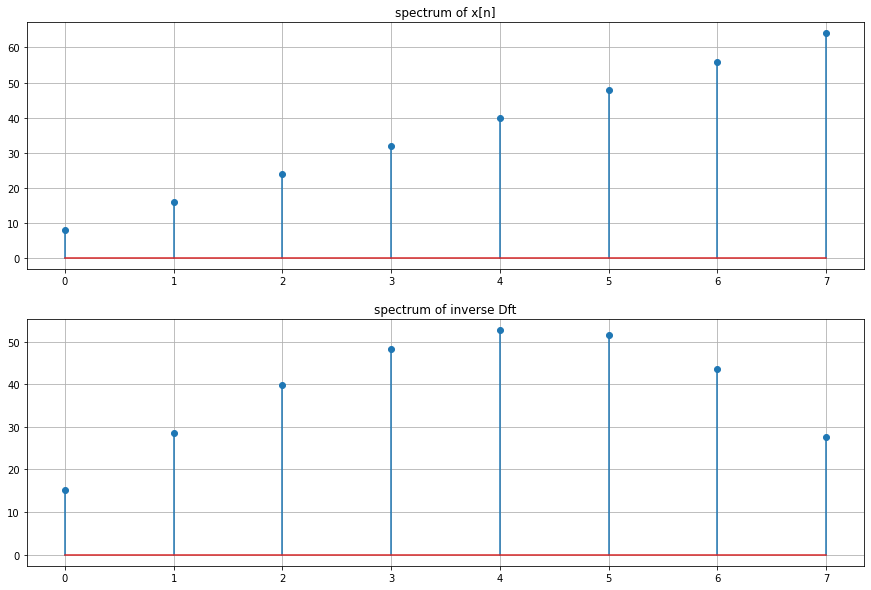

In [84]:
def inverseDCT(N,s,c):
    x=[]
    for i in range(0,N):
        summ = 0
        for j in range(0,N):
            summ = summ + s[j]*c[j]*np.cos(((np.pi*j)(2*N))*(2*n+1))
        x.append(summ*np.sqrt(2/N))
    return x

c = [1/np.sqrt(2),1,1,1,1,1,1,1]
N =8
inverse = DCT(N,dct,c)
print("the inverse DCT of the sequence : ",inverse)

x =[8,16,24,32,40,48,56,64]
fig= plt.figure(figsize=(15,10))
n =np.arange(0,8,1)

plt.subplot(2,1,1)
plt.stem(n,x)
plt.title('spectrum of x[n]')
plt.grid()

plt.subplot(2,1,2)
plt.stem(n,inverse)
plt.title('spectrum of inverse Dft')
plt.grid()

# Also compute the mean square error between the two signals.

In [85]:
meansq_error = 0
for i in range(N):
    meansq_error += (x[i]-inverse[i])**2
print("mean sq error between two signals: ",meansq_error/N)   

mean sq error between two signals:  297.49177499999996


# Now repeat the same process with DFT and compare the mean square errors. Comment on your observations.

In [86]:
meansq_error = 0
for i in range(N):
    meansq_error += (x[i]-dct[i])**2
print("mean sq error between DFT of two signals:",meansq_error/N) 

mean sq error between DFT of two signals: 3335.4570374999994
